In [25]:
import json
import matplotlib
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import display

In [26]:
class ARCDataReader:
    def __init__(self, json_file_path):
        """
        Initialize the ARCDataReader with a JSON file path.
        
        Parameters:
        json_file_path (str): Path to the JSON file containing ARC tasks
        """
        self.json_file_path = json_file_path
        self.data = self._load_data()
        
        # Define ARC colors - standard mapping from 0-9 to colors
        self.arc_colors = [
            '#000000',  # 0: Black
            '#0074D9',  # 1: Blue
            '#FF4136',  # 2: Red
            '#2ECC40',  # 3: Green
            '#FFDC00',  # 4: Yellow
            '#AAAAAA',  # 5: Gray
            '#F012BE',  # 6: Magenta
            '#FF851B',  # 7: Orange
            '#7FDBFF',  # 8: Cyan
            '#FFFFFF',  # 9: White
        ]
        self.cmap = ListedColormap(self.arc_colors)
        
    def _load_data(self):
        """Load the data from the JSON file."""
        try:
            with open(self.json_file_path, 'r') as f:
                return json.load(f)
        except FileNotFoundError:
            print(f"Error: File '{self.json_file_path}' not found")
            return {}
        except json.JSONDecodeError:
            print(f"Error: File '{self.json_file_path}' is not a valid JSON file")
            return {}
    
    def get_task_ids(self):
        """
        Return a list of all task IDs.
        
        Returns:
        list: List of task IDs
        """
        # If the JSON is a dictionary with task IDs as keys
        if isinstance(self.data, dict):
            return list(self.data.keys())
        # If the JSON is a list of files in a directory
        elif isinstance(self.data, list):
            return [os.path.splitext(os.path.basename(task))[0] for task in self.data]
        # If the JSON is just a single task (like the example)
        else:
            return ["task"]
    
    def get_task_by_id(self, task_id):
        """
        Get a specific task by ID.
        
        Parameters:
        task_id (str): ID of the task to retrieve
        
        Returns:
        dict: Task data, or None if not found
        """
        # If the JSON is a dictionary with task IDs as keys
        if isinstance(self.data, dict):
            return self.data.get(task_id)
        # If the JSON is just a single task
        elif task_id == "task":
            return self.data
        return None
    
    def visualize(self, task_id, figsize=(12, 8)):
        """
        Visualize a specific task by ID with colored grids in a Jupyter notebook.
        
        Parameters:
        task_id (str): ID of the task to visualize
        figsize (tuple): Figure size for the visualization
        """
        task = self.get_task_by_id(task_id)
        if not task:
            print(f"Task with ID '{task_id}' not found")
            return
        
        num_train_examples = len(task['train'])
        num_test_examples = len(task['test'])
        total_examples = num_train_examples + num_test_examples
        
        # Determine grid layout
        cols = min(3, total_examples * 2)  # 2 grids per example (input & output)
        rows = (total_examples * 2 + cols - 1) // cols
        
        fig, axes = plt.subplots(rows, cols, figsize=figsize)
        fig.suptitle(f'ARC Task: {task_id}', fontsize=16)
        
        # Flatten axes if it's a multi-dimensional array
        if rows > 1 or cols > 1:
            axes = axes.flatten()
        else:
            axes = [axes]
        
        # Plot training examples
        ax_index = 0
        for i, example in enumerate(task['train']):
            # Plot input grid
            ax = axes[ax_index]
            input_grid = np.array(example['input'])
            im = ax.imshow(input_grid, cmap=self.cmap, vmin=0, vmax=9)
            ax.set_title(f'Train Example {i+1}: Input')
            ax.set_xticks(np.arange(input_grid.shape[1]))
            ax.set_yticks(np.arange(input_grid.shape[0]))
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.grid(color='black', linestyle='-', linewidth=1)
            
            # Add grid values as text
            for y in range(input_grid.shape[0]):
                for x in range(input_grid.shape[1]):
                    text_color = 'black' if input_grid[y, x] in [4, 5, 8, 9] else 'white'
                    ax.text(x, y, str(input_grid[y, x]), ha='center', va='center', color=text_color)
            
            ax_index += 1
            
            # Plot output grid
            ax = axes[ax_index]
            output_grid = np.array(example['output'])
            im = ax.imshow(output_grid, cmap=self.cmap, vmin=0, vmax=9)
            ax.set_title(f'Train Example {i+1}: Output')
            ax.set_xticks(np.arange(output_grid.shape[1]))
            ax.set_yticks(np.arange(output_grid.shape[0]))
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.grid(color='black', linestyle='-', linewidth=1)
            
            # Add grid values as text
            for y in range(output_grid.shape[0]):
                for x in range(output_grid.shape[1]):
                    text_color = 'black' if output_grid[y, x] in [4, 5, 8, 9] else 'white'
                    ax.text(x, y, str(output_grid[y, x]), ha='center', va='center', color=text_color)
            
            ax_index += 1
        
        # Plot test examples
        for i, example in enumerate(task['test']):
            # Plot input grid
            ax = axes[ax_index]
            input_grid = np.array(example['input'])
            im = ax.imshow(input_grid, cmap=self.cmap, vmin=0, vmax=9)
            ax.set_title(f'Test Example {i+1}: Input')
            ax.set_xticks(np.arange(input_grid.shape[1]))
            ax.set_yticks(np.arange(input_grid.shape[0]))
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.grid(color='black', linestyle='-', linewidth=1)
            
            # Add grid values as text
            for y in range(input_grid.shape[0]):
                for x in range(input_grid.shape[1]):
                    text_color = 'black' if input_grid[y, x] in [4, 5, 8, 9] else 'white'
                    ax.text(x, y, str(input_grid[y, x]), ha='center', va='center', color=text_color)
            
            ax_index += 1
            
            # Plot output grid if available
            if 'output' in example:
                ax = axes[ax_index]
                output_grid = np.array(example['output'])
                im = ax.imshow(output_grid, cmap=self.cmap, vmin=0, vmax=9)
                ax.set_title(f'Test Example {i+1}: Output')
                ax.set_xticks(np.arange(output_grid.shape[1]))
                ax.set_yticks(np.arange(output_grid.shape[0]))
                ax.set_xticklabels([])
                ax.set_yticklabels([])
                ax.grid(color='black', linestyle='-', linewidth=1)
                
                # Add grid values as text
                for y in range(output_grid.shape[0]):
                    for x in range(output_grid.shape[1]):
                        text_color = 'black' if output_grid[y, x] in [4, 5, 8, 9] else 'white'
                        ax.text(x, y, str(output_grid[y, x]), ha='center', va='center', color=text_color)
                
                ax_index += 1
            else:
                # If no output, just show a blank grid with a message
                ax = axes[ax_index]
                ax.text(0.5, 0.5, "Output Not Available", ha='center', va='center')
                ax.set_title(f'Test Example {i+1}: Output (Unknown)')
                ax.axis('off')
                ax_index += 1
        
        # Hide unused subplots
        for i in range(ax_index, len(axes)):
            axes[i].axis('off')
        
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for the suptitle
        plt.show()
        
    def text_visualize(self, task_id):
        """
        Visualize a specific task by ID using text representation.
        
        Parameters:
        task_id (str): ID of the task to visualize
        """
        task = self.get_task_by_id(task_id)
        if not task:
            print(f"Task with ID '{task_id}' not found")
            return
        
        print(f"Task ID: {task_id}")
        print("=" * 40)
        
        # Display training examples
        print("TRAINING EXAMPLES:")
        for i, example in enumerate(task['train']):
            print(f"\nExample {i+1}:")
            print("Input:")
            for row in example['input']:
                print(" ".join(str(cell) for cell in row))
            print("Output:")
            for row in example['output']:
                print(" ".join(str(cell) for cell in row))
        
        # Display test examples
        print("\nTEST EXAMPLES:")
        for i, example in enumerate(task['test']):
            print(f"\nTest {i+1}:")
            print("Input:")
            for row in example['input']:
                print(" ".join(str(cell) for cell in row))
            if 'output' in example:  # Output may not be available for test data
                print("Output:")
                for row in example['output']:
                    print(" ".join(str(cell) for cell in row))

In [27]:
reader = ARCDataReader("arc-agi_training_challenges.json")

In [28]:
task_ids = reader.get_task_ids()

In [32]:
task_id = task_ids[0]

In [33]:
task = reader.get_task_by_id(task_id)

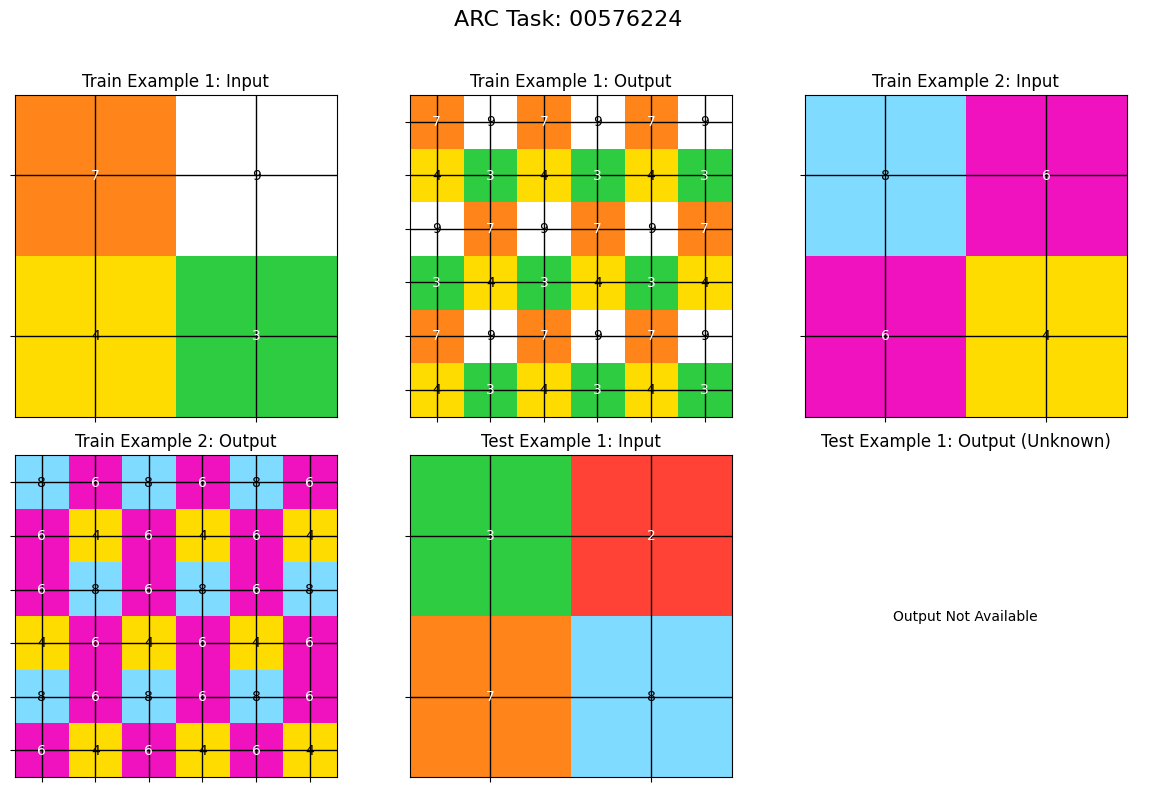

In [34]:
reader.visualize(task_id)

In [36]:
from transformers import AutoModelForCausalLM, AutoTokenizer
model_name = "Qwen/Qwen3-0.6B"

In [39]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

model.safetensors:   0%|          | 0.00/1.50G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [40]:
prompt = "Give me a short introduction to large language model."
messages = [
    {"role": "user", "content": prompt}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
    enable_thinking=True
)
model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

In [ ]:
generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=32768
)
output_ids = generated_ids[0][len(model_inputs.input_ids[0]):].tolist() 

In [ ]:
index = 0
thinking_content = tokenizer.decode(output_ids[:index], skip_special_tokens=True).strip("\n")
content = tokenizer.decode(output_ids[index:], skip_special_tokens=True).strip("\n")

print("thinking content:", thinking_content)
print("content:", content)